In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv

def carga_csv(filename):
    data = read_csv(filename, header=None)
    return np.array(data.astype(float))

data = carga_csv("ex2data1.csv")
print(data)

[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]
 [61.10666454 96.51142588  1.        ]
 [75.02474557 46.55401354  1.        ]
 [76.0987867  87.42056972  1.        ]
 [84.43281996 43.53339331  1.        ]
 [95.86155507 38.22527806  0.        ]
 [75.01365839 30.60326323  0.        ]
 [82.30705337 76.4819633   1.        ]
 [69.36458876 97.71869196  1.        ]
 [39.53833914 76.03681085  0.        ]
 [53.97105215 89.20735014  1.        ]
 [69.07014406 52.74046973  1.        ]
 [67.94685548 46.67857411  0.        ]
 [70.66150955 92.92713789  1.        ]
 [76.97878373 47.57596365  1.        ]
 [67.37202755 42.83843832  0.        ]
 [89.67677575 65.79936593  1.        ]
 [50.53478829 48.85581153  0.        ]
 [34.21206098 44.2095286   0.        ]
 [77.92409145 68.97235999  1.        ]
 [62.27101367 69.95445795

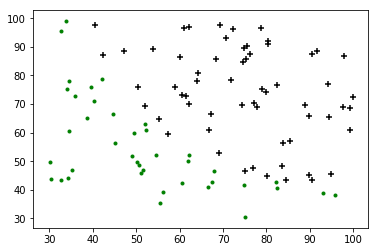

In [4]:


X = data[:,:-1]
Y = data[:,-1]
pos = np.where(Y == 1)
neg = np.where(Y == 0)

plt.figure()
plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k')
plt.scatter(X[neg, 0], X[neg, 1], marker='.',c='g')
plt.show()

In [5]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# plt.plot(np.linspace(-5, 5, 10000),sigmoid(np.linspace(-5, 5, 10000)))

In [6]:
def coste(theta, x, y):
    return -(np.dot(np.transpose(np.log(sigmoid(np.matmul(x, theta)))), y) + np.dot(np.transpose(np.log(1 - sigmoid(np.matmul(x, theta)))), (1 - y)))/len(y)

In [7]:
def gradiente(theta, x, y):
    return (np.matmul(np.transpose(x), (sigmoid(np.matmul(x, theta)) - y)))/len(y)

In [8]:
Xaux = np.hstack([np.ones((len(Y), 1)), X])
theta = [0,0,0]
print(coste(theta, Xaux,Y))
print(gradiente(theta, Xaux,Y))

0.6931471805599452
[ -0.1        -12.00921659 -11.26284221]


In [9]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=coste, x0=theta, fprime=gradiente, args=(Xaux, Y))
theta_opt = result [0]
coste(theta_opt, Xaux, Y)

0.20349770158947497

In [12]:
def pinta_frontera_recta(X, Y, theta):
    plt.figure()
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))

    h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)),
    xx1.ravel(),
    xx2.ravel()].dot(theta))
    h = h.reshape(xx1.shape)

    # el cuarto parámetro es el valor de z cuya frontera se
    # quiere pintar
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k')
    plt.scatter(X[neg, 0], X[neg, 1], marker='.',c='g')
    plt.savefig("frontera.pdf")
    #plt.close()

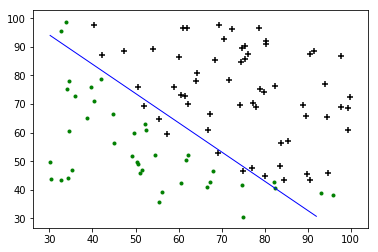

In [13]:
pinta_frontera_recta(X, Y, theta_opt)